In [1]:
class DataDescribe(object):
    
    def __init__(self,dataFileName):
        import pandas as pd
        
        self.__dataFileName = dataFileName
        self.__data = pd.DataFrame()
    
    def run(self):
        import pandas as pd
        import numpy as np
        from scipy.stats import shapiro, levene, f_oneway
        import matplotlib.pyplot as plt
        %matplotlib inline  
        import seaborn as sns
        import warnings
        warnings.filterwarnings("ignore")
        
        dataFrame = pd.read_csv(self.__dataFileName)
        
        # In data, shorten the str values
        columnsIncludeStr = [i for i in dataFrame.columns if type(dataFrame[i].values[0]) == type("ali")]
        for i in range(len(columnsIncludeStr)):
            charColumn = dataFrame[columnsIncludeStr[i]].astype(str)
            newCharColumn = np.array([col[0] for col in charColumn])
            dataFrame[columnsIncludeStr[i]] = newCharColumn
        
        self.__data["NormalDistP-Value"] = ["NaN" if type(dataFrame[i].values[0]) == type("ali") else 
                                          shapiro(dataFrame[i])[1] for i in dataFrame.columns]
        self.__data["NormalDistStatistic"] = ["NaN" if type(dataFrame[i].values[0]) == type("ali") else 
                                            shapiro(dataFrame[i])[0] for i in dataFrame.columns]
        self.__data.index = dataFrame.columns
        
        self.__data = pd.concat([dataFrame.describe().T, self.__data], axis = 1)
        
        plt.figure(figsize=(15,9))
        dataFrame.boxplot()
        
        plt.figure()
        dataFrame.plot.hist(subplots=True, figsize=(15,25))
        
        arr = np.zeros([len(dataFrame.columns), len(dataFrame.columns)])
        for i in range(len(dataFrame.columns)):
            for j in range(len(dataFrame.columns)):
                if type(dataFrame[dataFrame.columns[i]].values[0]) == type("ali") or type(dataFrame[dataFrame.columns[j]].values[0])== type("ali"):
                    arr[i,j] = np.nan
                else:
                    arr[i,j] = levene(dataFrame[dataFrame.columns[i]],dataFrame[dataFrame.columns[j]])[1]
        
        arr = pd.DataFrame(arr)
        arr.index = dataFrame.columns
        arr.columns = dataFrame.columns
        
        plt.figure(figsize=(15,9))
        ax = plt.axes()
        sns.heatmap(arr, annot=True, fmt=".3f", ax = ax)
        ax.set_title('Levene Test Scores by 2 Combinations')
        
        arr = np.zeros([len(dataFrame.columns), len(dataFrame.columns)])
        for i in range(len(dataFrame.columns)):
            for j in range(len(dataFrame.columns)):
                if type(dataFrame[dataFrame.columns[i]].values[0]) == type("ali") or type(dataFrame[dataFrame.columns[j]].values[0])== type("ali"):
                    arr[i,j] = np.nan
                else:
                    arr[i,j] = f_oneway(dataFrame[dataFrame.columns[i]],dataFrame[dataFrame.columns[j]])[1]
        
        arr = pd.DataFrame(arr)
        arr.index = dataFrame.columns
        arr.columns = dataFrame.columns
        
        plt.figure(figsize=(15,9))
        ax = plt.axes()
        sns.heatmap(arr, annot=True, fmt=".3f", ax = ax)
        ax.set_title('One-Way ANOVA Test Scores by 2 Combinations')
        
        plt.figure(figsize=(15,9))
        ax = plt.axes()
        sns.heatmap(dataFrame.corr(), annot=True, fmt = ".3f", ax = ax)
        ax.set_title('Corralation Matrix')
        
        arr = pd.DataFrame(dataFrame.isna().sum())
        arr.columns = ["NumberOfNaN"]
        self.__data = pd.concat([self.__data, arr],axis=1)
        
        return self.__data

,count,mean,std,min,25%,50%,75%,max,NormalDistP-Value,NormalDistStatistic,NumberOfNaN
bad,99.0,0.000000,0.000000,0.000,0.0000,0.000,0.00,0.000,1,1,0
clage,61.0,137.968525,43.009230,63.120,104.1800,138.000,163.30,225.690,1,NaN,38
clno,61.0,16.098361,6.043467,9.000,11.0000,15.000,17.00,30.000,1,NaN,38
debtinc,90.0,32.596933,5.066862,20.028,29.1995,32.555,36.53,41.035,1,NaN,9
delinq,61.0,0.131148,0.340363,0.000,0.0000,0.000,0.00,1.000,1,NaN,38
derog,54.0,0.129630,0.339050,0.000,0.0000,0.000,0.00,1.000,1,NaN,45
job,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,99
loan,99.0,20011.111111,19988.189824,5000.000,8950.0000,15100.000,20700.00,82200.000,3.21593e-15,0.589072,0
mortdue,99.0,62813.424242,27561.845389,12340.000,44890.0000,59658.000,83559.00,119879.000,0.0154069,0.967652,0
ninq,54.0,0.796296,1.088181,0.000,0.0000,0.000,1.00,4.000,1,NaN,45


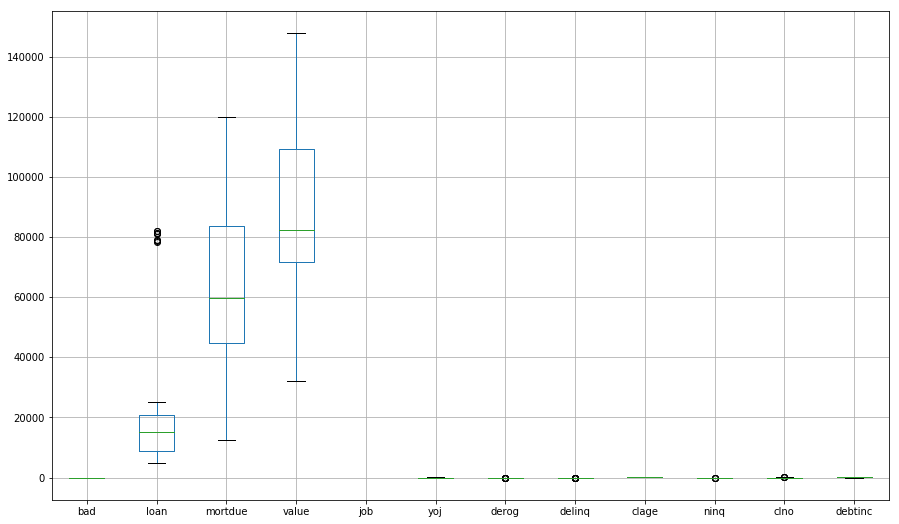

<Figure size 432x288 with 0 Axes>

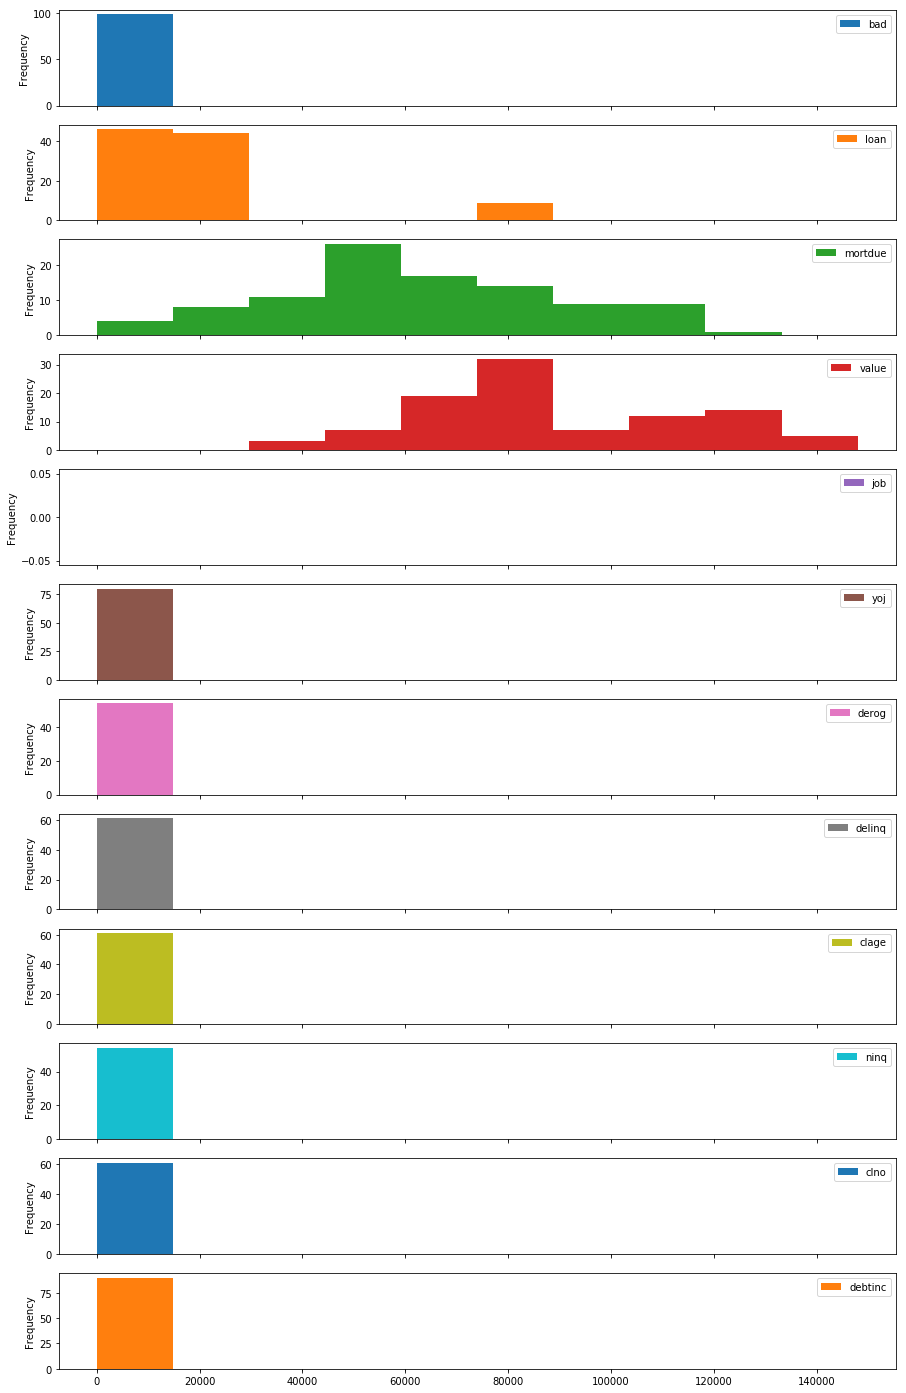

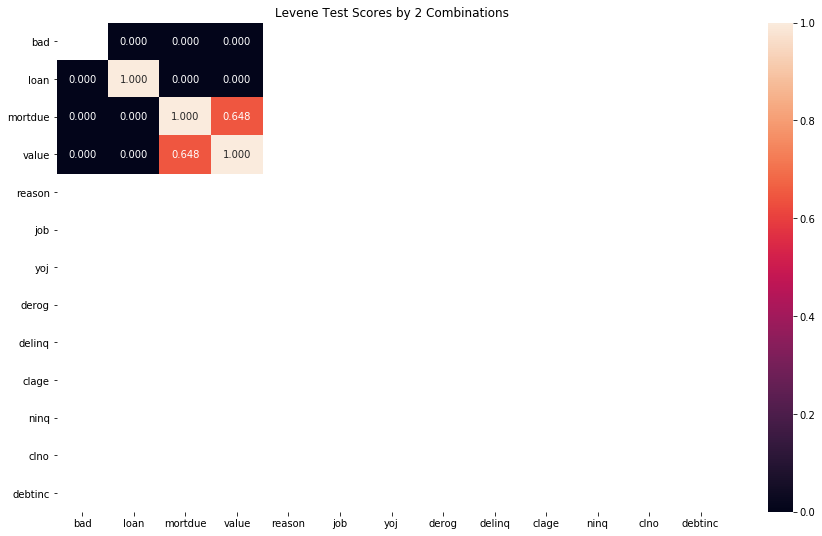

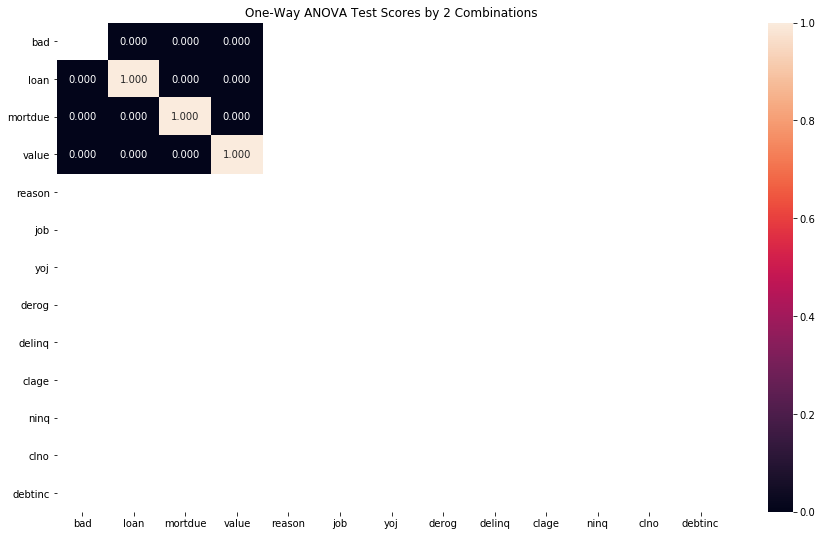

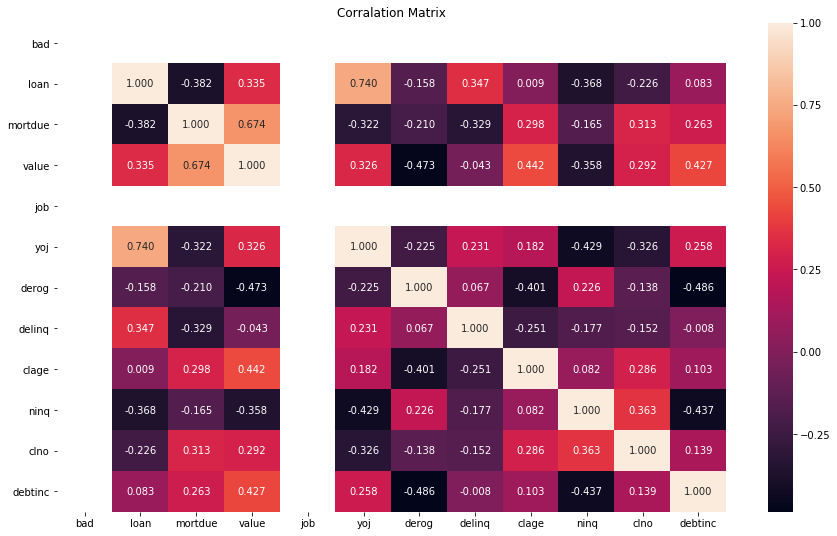

In [2]:
dataObject = DataDescribe("hmelq.mini.csv")
dataDescribe = dataObject.run()
dataDescribe

In [3]:
import gc
gc.collect()

63261